# Convolution

In discrete time:

\begin{equation}
y[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n-k]
\end{equation}

Where: 
- $x[n]$ is the input signal
- $h[n]$ is the impulse response
- $y[n]$ is the output signal.

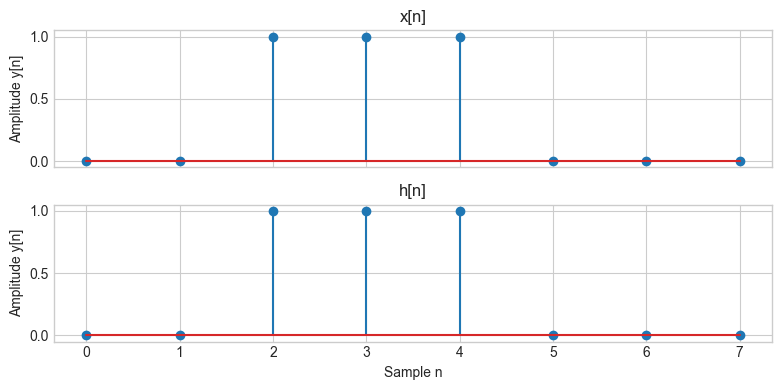

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# Define two example signals
x = np.array([0., 0., 1., 1., 1., 0., 0., 0.])
h = np.array([0., 0., 1., 1., 1., 0., 0., 0.])

# Create a custom x-axis array for the stem plots
t = np.arange(len(x))

# Plot the signals
figure, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 4))
axes[0].stem(t, x, label='x[n]')
axes[1].stem(t, h, label='h[n]')

# Set the labels and titles
axes[0].set_ylabel('Amplitude y[n]')
axes[1].set_ylabel('Amplitude y[n]')
axes[1].set_xlabel('Sample n')
axes[0].set_title('x[n]')
axes[1].set_title('h[n]')
plt.tight_layout()
plt.show()

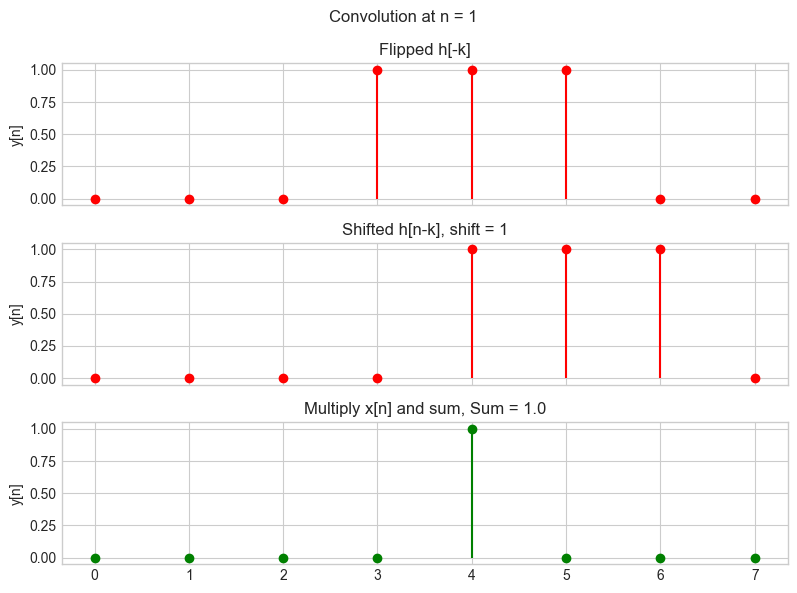

In [2]:
h_flipped = np.flip(h)

shift_value = 1
h_shifted = np.roll(h_flipped, shift_value)

y_multiply = x * h_shifted

y_sum = np.sum(y_multiply)

fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
fig.suptitle(f'Convolution at n = {shift_value}')
# Flipped h[n-k]
axs[0].stem(t, np.flip(h), linefmt='r-', markerfmt='ro', basefmt=' ')
axs[0].set_title('Flipped h[-k]')
axs[0].set_ylabel('y[n]')

# Shifted h[n-k]
axs[1].stem(t, h_shifted, linefmt='r-', markerfmt='ro', basefmt=' ')
axs[1].set_title(f'Shifted h[n-k], shift = {shift_value}')
axs[1].set_ylabel('y[n]')

# Multiply
axs[2].stem(t, y_multiply, linefmt='g-', markerfmt='go', basefmt=' ')
axs[2].set_title(f'Multiply x[n] and sum, Sum = {y_sum}')
axs[2].set_ylabel('y[n]')

plt.tight_layout()
plt.show()

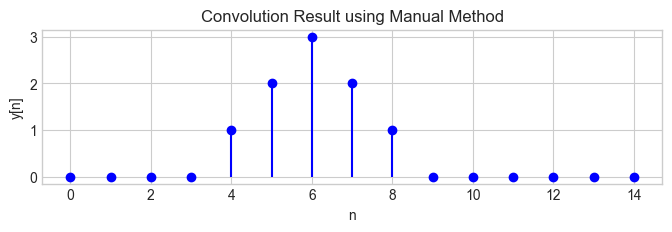

array([0., 0., 0., 0., 1., 2., 3., 2., 1., 0., 0., 0., 0., 0., 0.])

In [3]:
# Initialize an array to store the convolution results
convolution_result = np.zeros(len(x) + len(h) - 1)

# Perform the convolution using a for loop
for i in range(len(convolution_result)):
    for j in range(len(h)):
        if i - j >= 0 and i - j < len(x):
            convolution_result[i] += x[i - j] * h[j]

# Plotting the result of the manual convolution
plt.figure(figsize=(8, 2))
plt.stem(range(len(convolution_result)), convolution_result, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Convolution Result using Manual Method')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

convolution_result

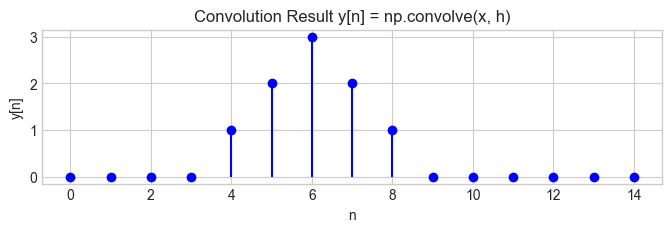

In [4]:
# Perform the convolution using numpy's convolve function
y = np.convolve(x, h)

# Create a new time axis for the convolution result
t_conv = np.arange(len(y))

# Plotting
fig, ax = plt.subplots(figsize=(8, 2))
ax.stem(t_conv, y, linefmt='b-', markerfmt='bo', basefmt=' ')
ax.set_title('Convolution Result y[n] = np.convolve(x, h)')
ax.set_xlabel('n')
ax.set_ylabel('y[n]')

plt.show()